In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score






In [4]:
data = pd.read_csv("Eartquakes-1990-2023.csv")

In [5]:
data.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [6]:
data.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [7]:
num_rows = data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 3445751


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [9]:
data.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [10]:
data['date'] = pd.to_datetime(data['date'], format='ISO8601', errors='coerce')

data.date

0         1990-01-01 00:22:33.990000+00:00
1         1990-01-01 00:24:51.210000+00:00
2         1990-01-01 00:34:43.450000+00:00
3         1990-01-01 00:58:32.130000+00:00
4         1990-01-01 01:03:44.490000+00:00
                        ...               
3445746   2023-07-29 10:34:11.941000+00:00
3445747   2023-07-29 10:36:15.715000+00:00
3445748   2023-07-29 10:40:15.940000+00:00
3445749   2023-07-29 10:55:46.040000+00:00
3445750   2023-07-29 11:08:57.884000+00:00
Name: date, Length: 3445751, dtype: datetime64[ns, UTC]

In [11]:
null_dates = data[data['date'].isna()]
null_dates

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date


In [12]:
not_null_dates = data[data['date'].notna()]
not_null_dates

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00


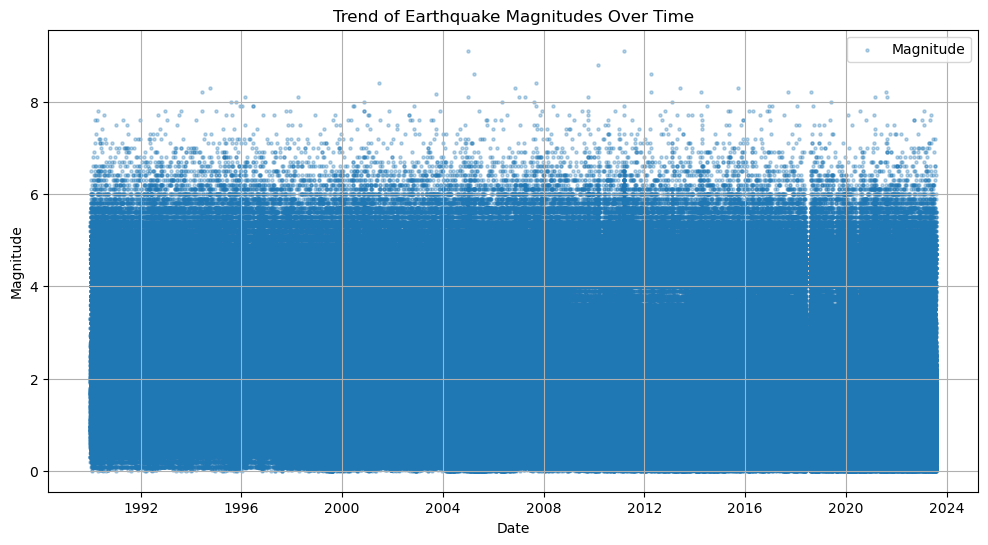

In [66]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])


df_cleaned = data[data["magnitudo"] > 0]


plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['date'], df_cleaned["magnitudo"], alpha=0.3, s=5, label="Magnitude")
plt.title("Trend of Earthquake Magnitudes Over Time")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


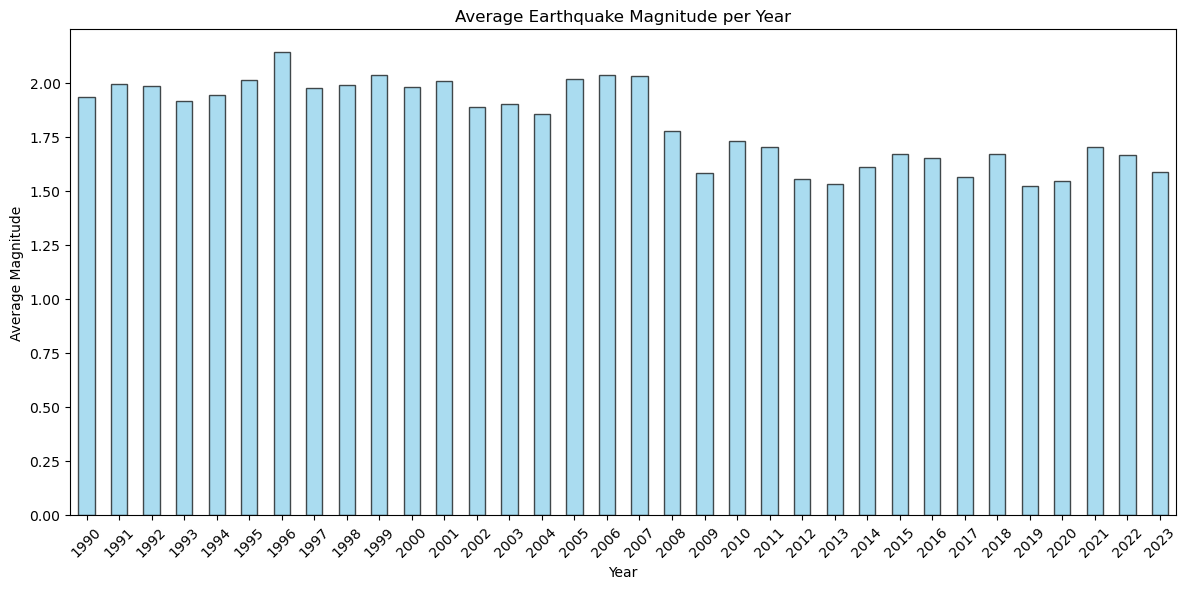

In [25]:
# Group data by year and calculate average magnitudes
data['year'] = pd.to_datetime(data['date']).dt.year
magnitude_per_year = data.groupby('year')["magnitudo"].mean()


plt.figure(figsize=(12, 6))
magnitude_per_year.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Average Earthquake Magnitude per Year")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


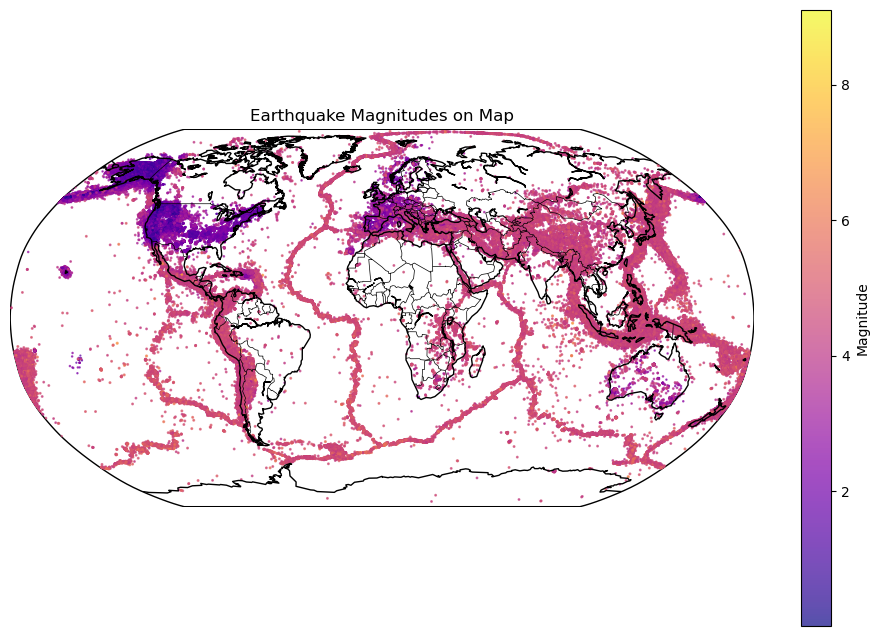

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


df = pd.DataFrame({
    "latitude": data.latitude,
    "longitude": data.longitude,
    "magnitude": data.magnitudo
})

# Filter out rows where magnitude is not positive
df = df[df["magnitude"] > 0]


plt.figure(figsize=(12, 8))

# Set up Basemap for a global view
m = Basemap(projection='robin', lon_0=0)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map projection coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Scatter plot with the size of the markers based on magnitude
m.scatter(x, y, c=df['magnitude'], s=df['magnitude'] * 1, cmap='plasma', alpha=0.7, marker='.')

# Add color bar
plt.colorbar(label='Magnitude')

# Add title
plt.title("Earthquake Magnitudes on Map")

# Show the plot
plt.show()


Mean Squared Error (MSE): 0.9032
Root Mean Squared Error (RMSE): 0.9504
Mean Absolute Error (MAE): 0.7146
R² Score: 0.4604


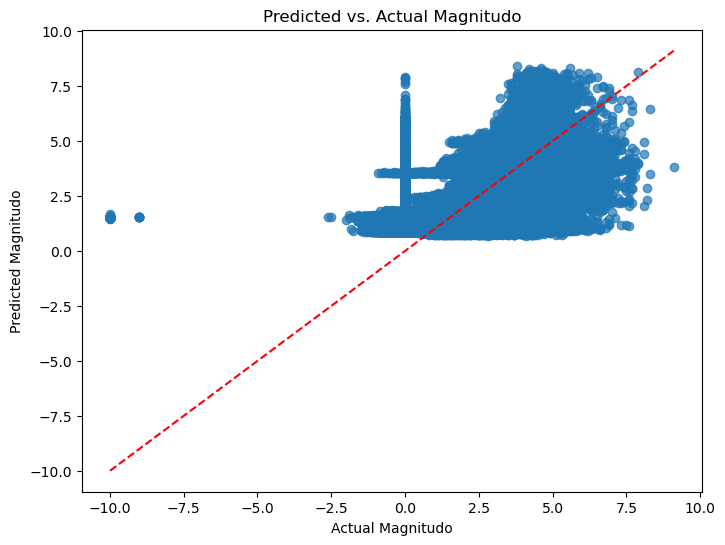

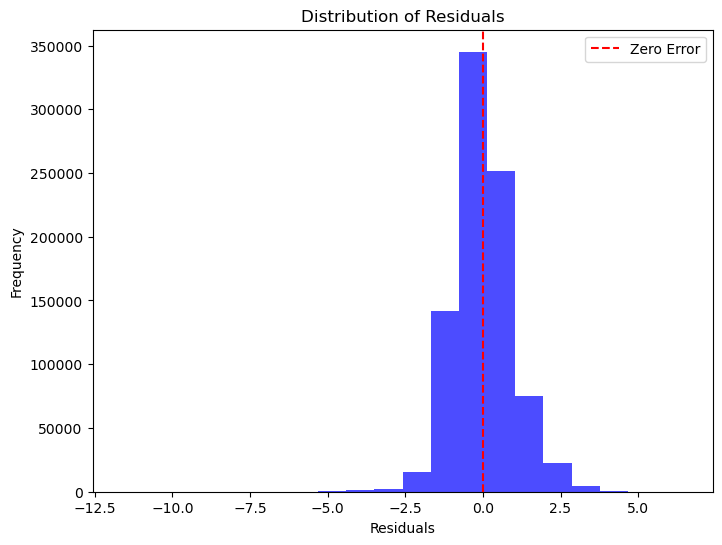

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


numerical_columns = ["magnitudo", "depth", "latitude", "longitude"]
data_numeric = data[numerical_columns]


X = data_numeric.drop(columns=["magnitudo"])
y = data_numeric["magnitudo"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Predicted vs. Actual Magnitudo")
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()




Mean Squared Error (MSE): 0.7652
Root Mean Squared Error (RMSE): 0.8748
Mean Absolute Error (MAE): 0.6750
R² Score: 0.5065


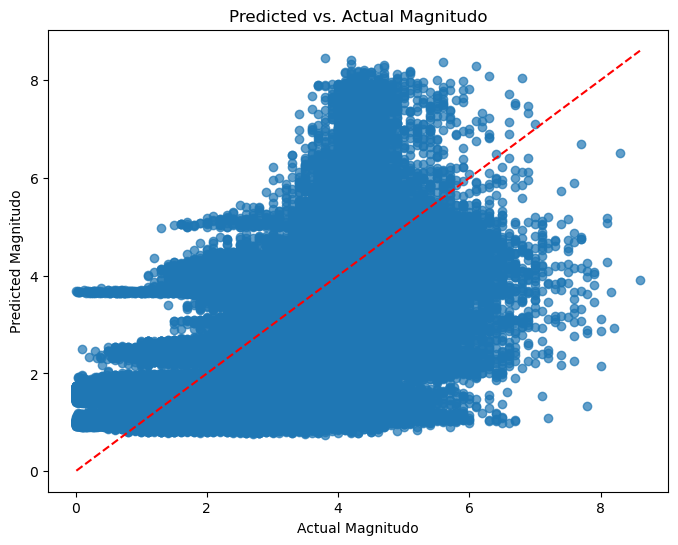

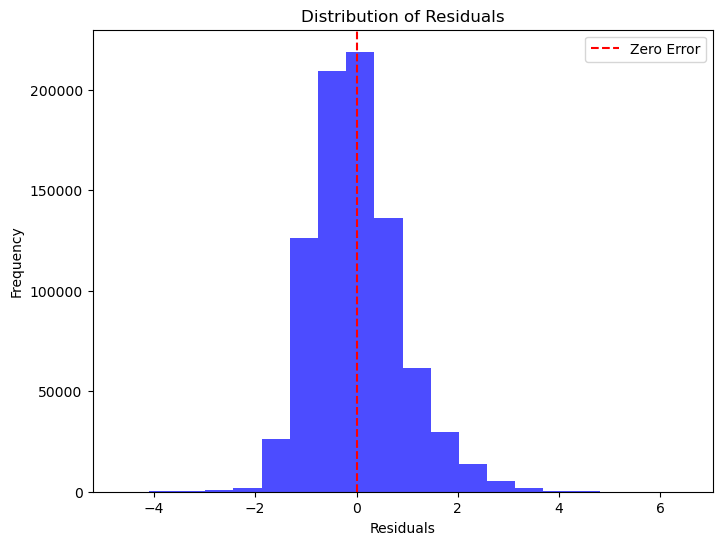

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preprocess the data: Keep only rows with positive magnitudes
data_positive = data[data["magnitudo"] > 0]


numerical_columns = ["magnitudo", "depth", "latitude", "longitude"]
data_numeric = data_positive[numerical_columns]


X = data_numeric.drop(columns=["magnitudo"])
y = data_numeric["magnitudo"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Predicted vs. Actual Magnitudo")
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()


Polynomial Regression (degree 2) Metrics:
Mean Squared Error (MSE): 0.7836
Root Mean Squared Error (RMSE): 0.8852
Mean Absolute Error (MAE): 0.6521
R² Score: 0.5318


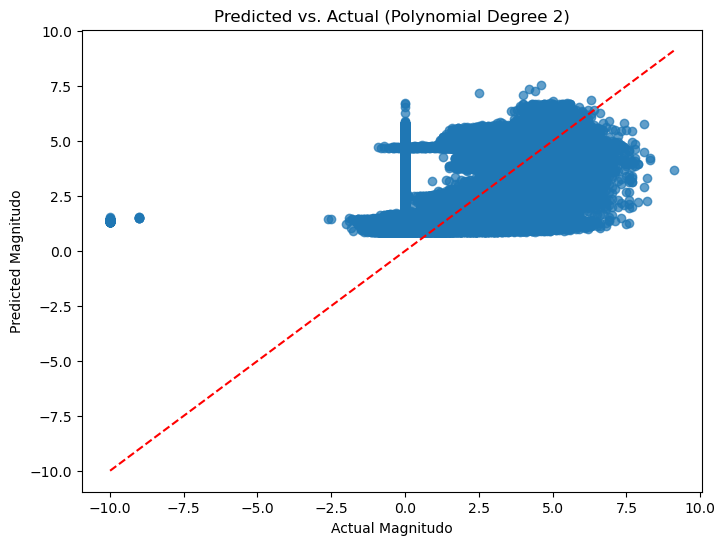

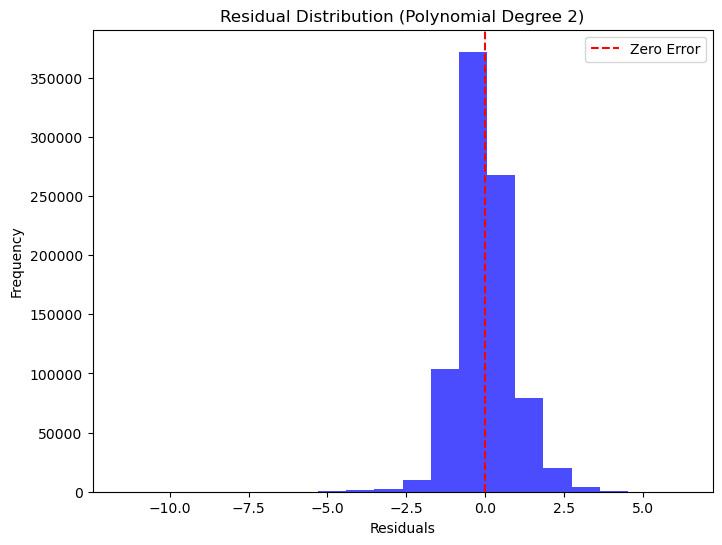

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


numerical_columns = ["depth", "latitude", "longitude"]  
X = data[numerical_columns]
y = data["magnitudo"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Transform features into polynomial terms
degree = 2  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#Linear Regression model for the polynomial features
poly_model = LinearRegression()


poly_model.fit(X_train_poly, y_train)


y_pred = poly_model.predict(X_test_poly)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Polynomial Regression (degree {degree}) Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title(f"Predicted vs. Actual (Polynomial Degree {degree})")
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title(f"Residual Distribution (Polynomial Degree {degree})")
plt.legend()
plt.show()




Polynomial Regression (degree 3) Metrics:
Mean Squared Error (MSE): 0.6593
Root Mean Squared Error (RMSE): 0.8120
Mean Absolute Error (MAE): 0.5910
R² Score: 0.6061


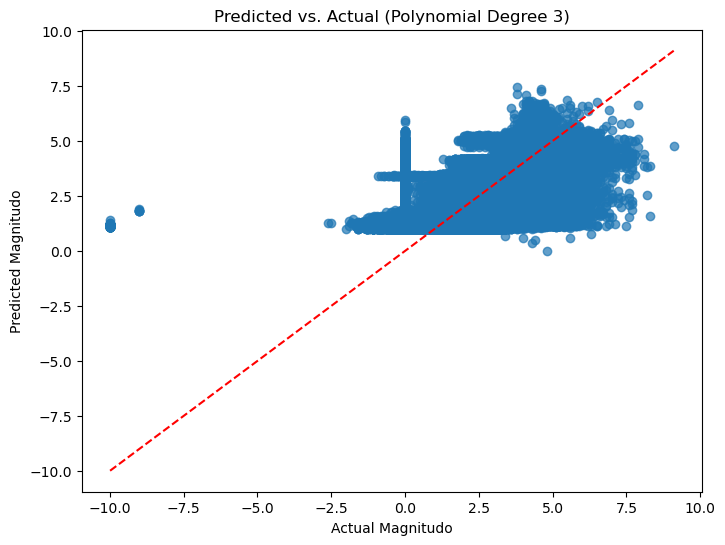

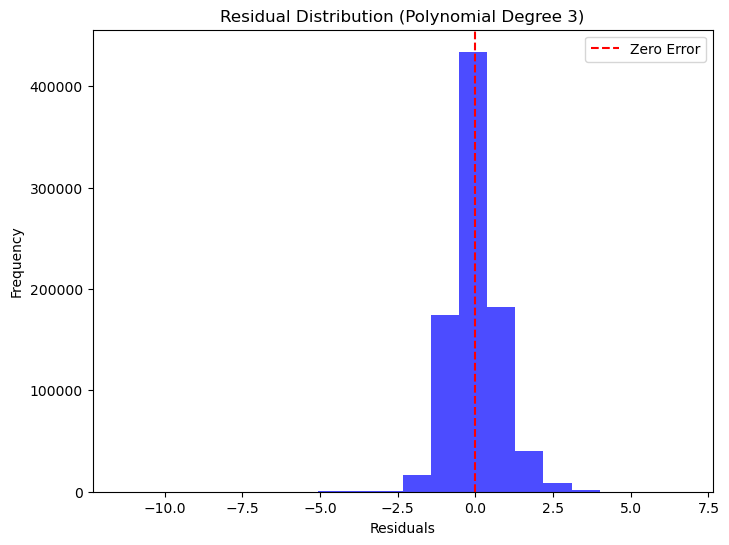

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


numerical_columns = ["depth", "latitude", "longitude"] 
X = data[numerical_columns]
y = data["magnitudo"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

degree = 3 
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


poly_model = LinearRegression()


poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Polynomial Regression (degree {degree}) Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title(f"Predicted vs. Actual (Polynomial Degree {degree})")
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title(f"Residual Distribution (Polynomial Degree {degree})")
plt.legend()
plt.show()




Ridge Regression Metrics:
Mean Squared Error (MSE): 0.9032
Root Mean Squared Error (RMSE): 0.9504
Mean Absolute Error (MAE): 0.7146
R² Score: 0.4604

Lasso Regression Metrics:
Mean Squared Error (MSE): 0.9033
Root Mean Squared Error (RMSE): 0.9504
Mean Absolute Error (MAE): 0.7145
R² Score: 0.4604

Ridge Coefficients: [ 0.00528704 -0.01506231  0.00743121]
Lasso Coefficients: [ 0.00527252 -0.01480337  0.00744754]


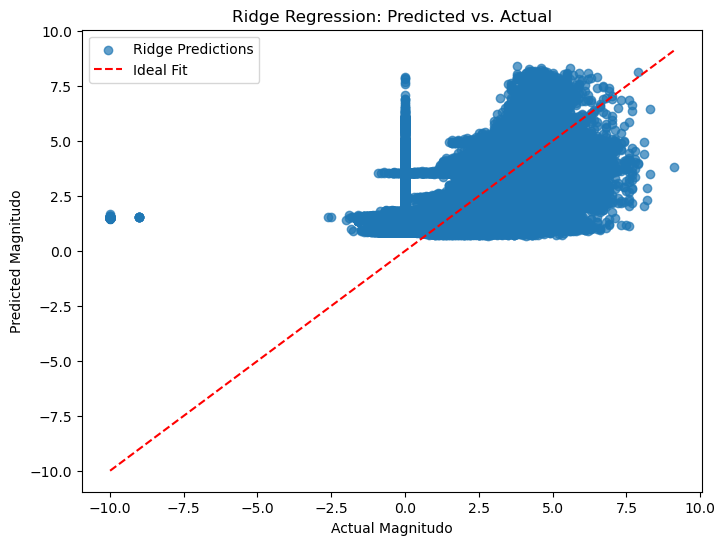

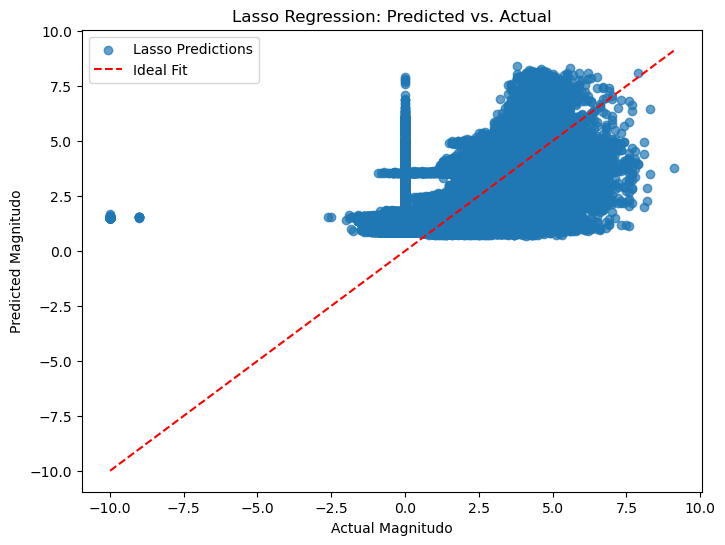

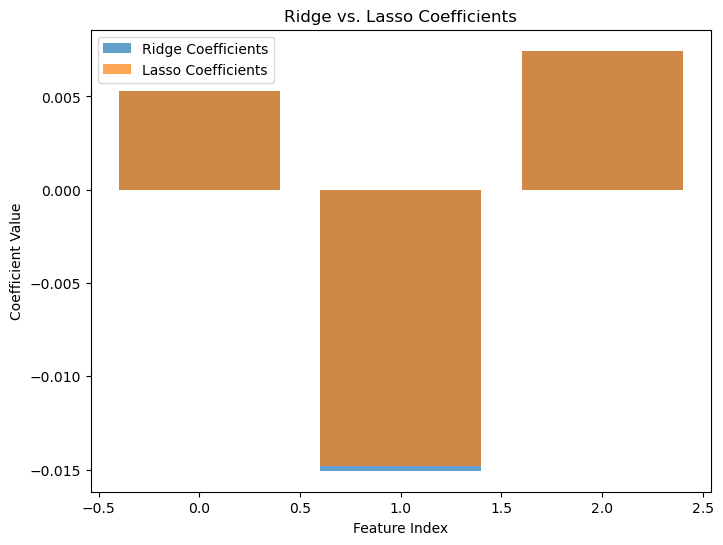

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = ["depth", "latitude", "longitude"]  
X = data[numerical_columns]
y = data["magnitudo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ---- Ridge Regression ----
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

# ---- Lasso Regression ----
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# Compare Coefficients
print("\nRidge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)



# Plot 1: Predicted vs. Actual for Ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label="Ridge Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Ridge Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 2: Predicted vs. Actual for Lasso
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label="Lasso Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Lasso Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 3: Coefficients Comparison
plt.figure(figsize=(8, 6))
indices = range(len(ridge.coef_))
plt.bar(indices, ridge.coef_, alpha=0.7, label="Ridge Coefficients")
plt.bar(indices, lasso.coef_, alpha=0.7, label="Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs. Lasso Coefficients")
plt.legend()
plt.show()


Optimized Coefficients: [ 1.7738222   0.28988657 -0.30816859  0.5713949 ]
Mean Squared Error (MSE): 0.9032
Root Mean Squared Error (RMSE): 0.9504
Mean Absolute Error (MAE): 0.7147
R² Score: 0.4604


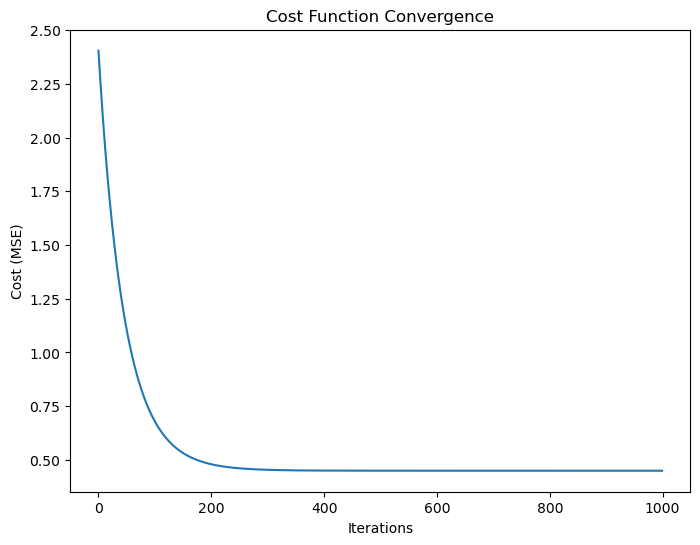

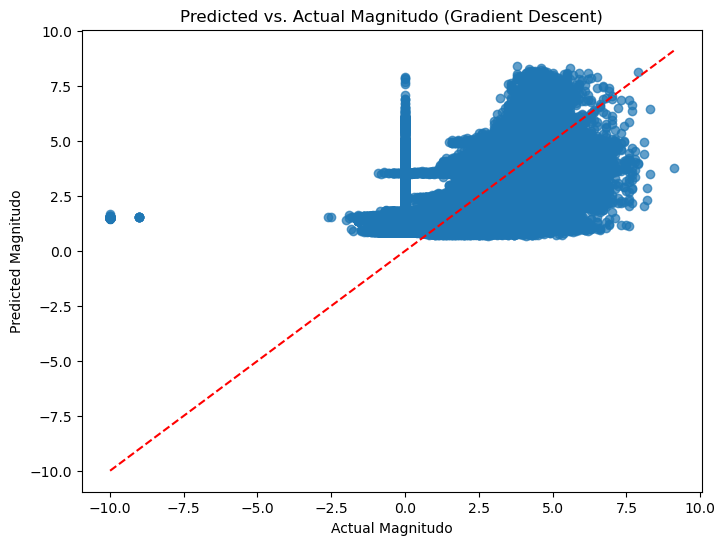

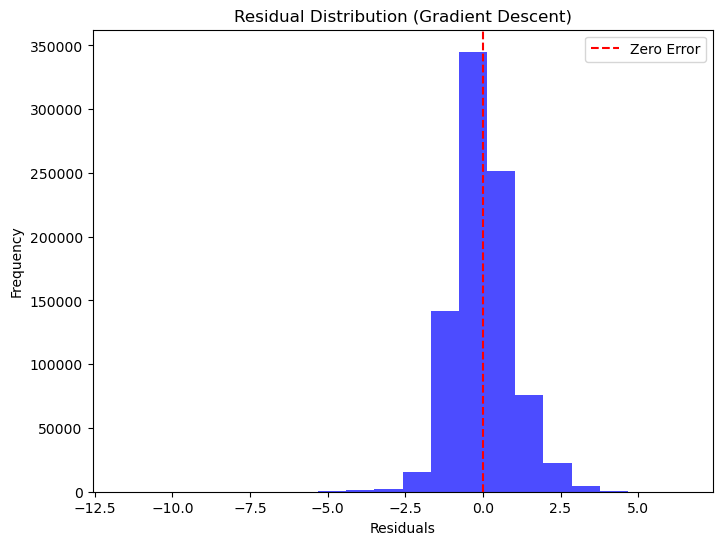

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)  # Number of training examples
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)  # Compute predictions
        errors = predictions - y  # Compute errors
        gradients = (1 / m) * X.T.dot(errors)  # Compute gradients
        theta -= learning_rate * gradients  # Update coefficients
        cost = (1 / (2 * m)) * np.sum(errors**2)  # Compute cost (MSE)
        cost_history.append(cost)

    return theta, cost_history

# Scale the features (excluding the intercept term)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["depth", "latitude", "longitude"]].values)

# Add the intercept term (column of ones)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Lower learning rate to avoid divergence
learning_rate = 0.01 
iterations = 1000

# Initialize coefficients
theta_initial = np.zeros(X_train.shape[1])

optimized_theta, cost_history = gradient_descent(X_train, y_train, theta_initial, learning_rate, iterations)

y_test_pred = X_test.dot(optimized_theta)

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Optimized Coefficients:", optimized_theta)
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

# Plot 1: Cost Function Convergence
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

# Plot 2: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Predicted vs. Actual Magnitudo (Gradient Descent)")
plt.show()

# Plot 3: Residuals Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Gradient Descent)")
plt.legend()
plt.show()




Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.4399
Root Mean Squared Error (RMSE): 0.6632
Mean Absolute Error (MAE): 0.4666
R² Score: 0.7368

Feature Importances:
depth: 0.1829
latitude: 0.3223
longitude: 0.4948


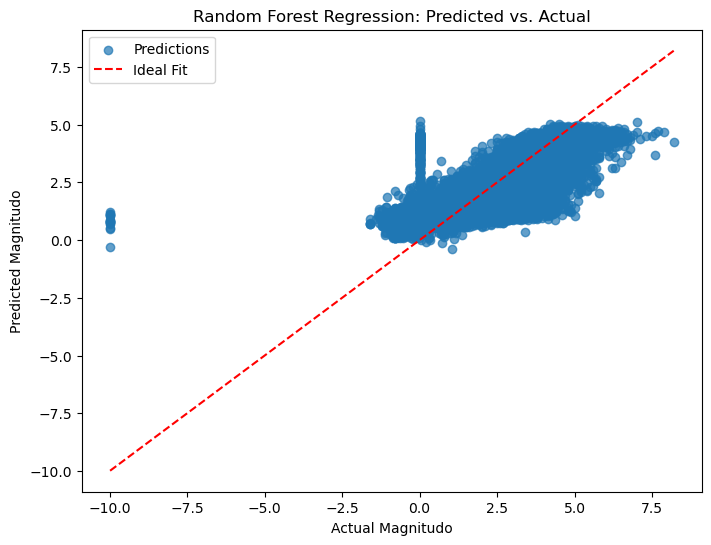

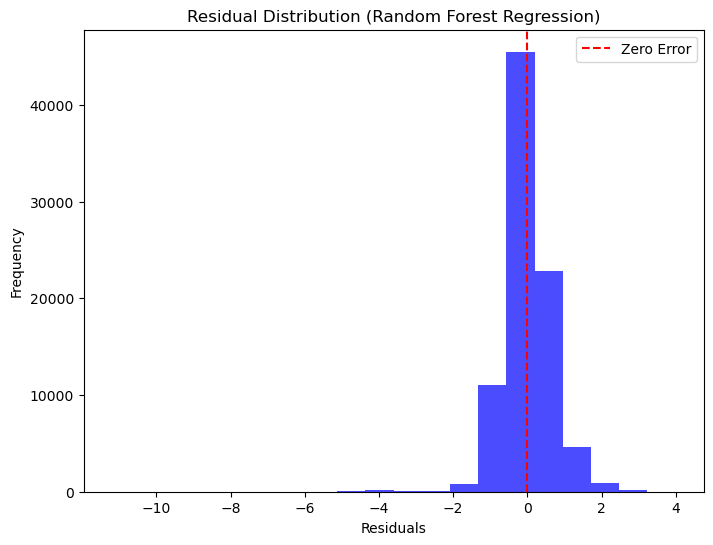

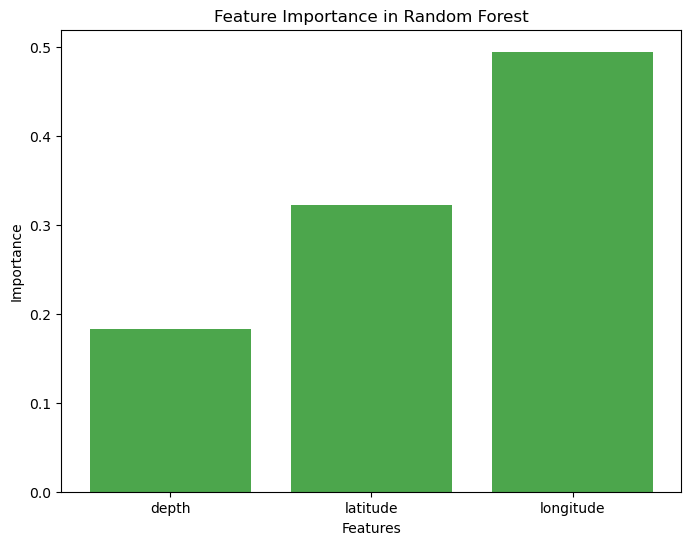

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

data_sample = data.sample(frac=0.1, random_state=42)

numerical_columns = ["depth", "latitude", "longitude"]
X = data_sample[numerical_columns].values
y = data_sample["magnitudo"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=20,         # Fewer trees for faster training
    max_depth=10,            # Limit depth to control complexity
    max_features='sqrt',     # Use a subset of features at each split
    n_jobs=-1,               # Utilize all CPU cores
    random_state=42          # Reproducibility
)

rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")



# Feature importance
feature_importance = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(numerical_columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Random Forest Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 2: Residual Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest Regression)")
plt.legend()
plt.show()

# Plot 3: Feature Importance
plt.figure(figsize=(8, 6))
plt.bar(numerical_columns, feature_importance, alpha=0.7, color='green')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


Decision Tree Regression Metrics:
Mean Squared Error (MSE): 0.5368
Root Mean Squared Error (RMSE): 0.7327
Mean Absolute Error (MAE): 0.5222
R² Score: 0.6793


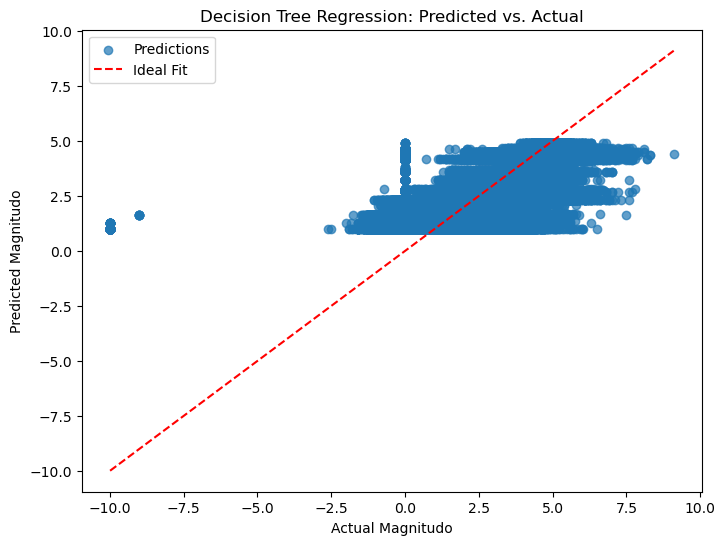

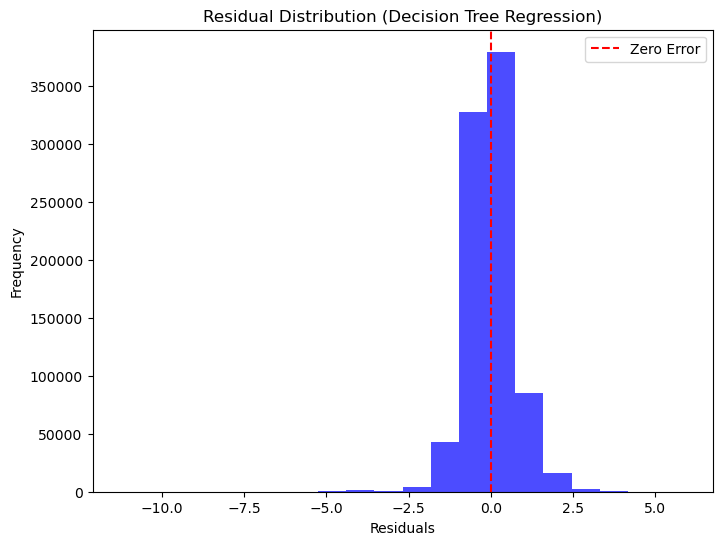

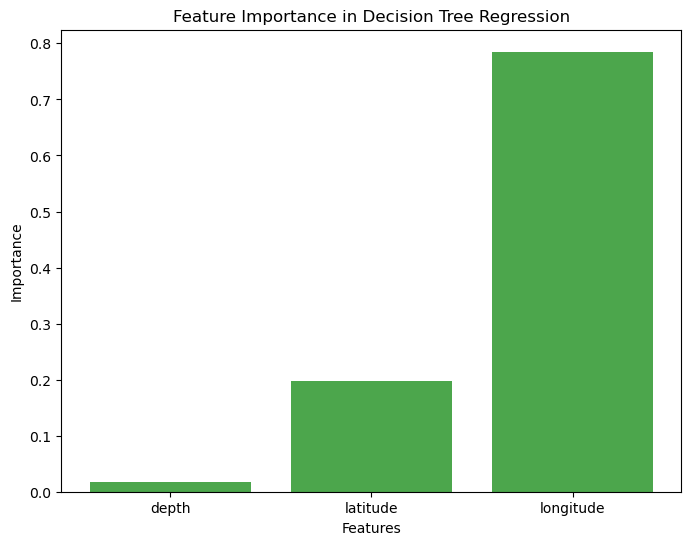

In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


numerical_columns = ["depth", "latitude", "longitude"]  
X = data[numerical_columns].values
y = data["magnitudo"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Set max_depth to avoid overfitting

tree_model.fit(X_train, y_train)

y_test_pred = tree_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Decision Tree Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")


# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Decision Tree Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 2: Residual Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Decision Tree Regression)")
plt.legend()
plt.show()

# Plot 3: Feature Importance
feature_importance = tree_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(numerical_columns, feature_importance, alpha=0.7, color='green')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree Regression")
plt.show()


In [72]:
new_data = np.array([[-118, 34.0, 16.0]])  
new_prediction = rf_model.predict(new_data)
print("Predicted value for new data:", new_prediction)

# Feature importance
feature_importance = rf_model.feature_importances_
for feature, importance in zip(numerical_columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Predicted value for new data: [3.15265504]
Feature: depth, Importance: 0.1829
Feature: latitude, Importance: 0.3223
Feature: longitude, Importance: 0.4948
